### Question

Conduct a trend analysis of some variable of interest. Graph it and try different functional forms. Look for subgroup variation across time, too. Extra credit if you consider other variables as a means of explaining the trend. Explain all of your results.

### Answer

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("trends-gss.csv")
data.head()

,abany,acqntsex,affrmact,age,aged,agekdbrn,agewed,anomia5,arrest,attend,...,workhard,world1,wrkgovt,wrkslf,wrkstat,xmarsex,xmovie,xnorcsiz,year,zodiac
0,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,2.0,1.0,NaN,NaN,3,1972,NaN
1,NaN,NaN,NaN,70.0,NaN,NaN,21.0,NaN,NaN,7.0,...,NaN,NaN,NaN,2.0,5.0,NaN,NaN,3,1972,NaN
2,NaN,NaN,NaN,48.0,NaN,NaN,20.0,NaN,NaN,4.0,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,3,1972,NaN
3,NaN,NaN,NaN,27.0,NaN,NaN,24.0,NaN,NaN,0.0,...,NaN,NaN,NaN,2.0,1.0,NaN,NaN,3,1972,NaN
4,NaN,NaN,NaN,61.0,NaN,NaN,22.0,NaN,NaN,0.0,...,NaN,NaN,NaN,2.0,7.0,NaN,NaN,3,1972,NaN


I want to analyze the trend in people's marital status and if sex, age, and the number of years of education have affected it. Therefore, I am going to use 'marital', 'year', 'sex', 'age' and 'educ' as my variables of interest.

In [5]:
sub=data[['marital','year','sex','age','educ']]

In [6]:
sub=sub.dropna()

In [7]:
sub['marital'].value_counts()


1.0    30628
5.0    11621
3.0     7026
2.0     5463
4.0     1964
Name: marital, dtype: int64

For the 'marital' variable, 1--Married, 2--Widowed, 3--Divorced, 4--Separated, 5--Never married. But below I reverse the labels of marital statuses to make "Married" correspond to the highest number and "Never married" correspond to the lowest number, which makes graphs easier to be understood.

In [8]:
sub['n_marital'] = sub['marital'].replace([1, 2, 4, 5], [5, 4, 2, 1])
sub['n_marital']

0        1.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
57056    1.0
57057    1.0
57058    5.0
57059    1.0
57060    1.0
Name: n_marital, Length: 56702, dtype: float64

In [9]:
sub['n_marital'].value_counts(normalize=True)

5.0    0.540157
1.0    0.204949
3.0    0.123911
4.0    0.096346
2.0    0.034637
Name: n_marital, dtype: float64

This shows that for all the years, about 54% of the respondents were married, 20.5% of the respondents were never merried, 12.4% of the respondents were divorced, and the rest were not very prominent.

In [10]:
# Understand the average marital status in each year
by_year = sub.groupby('year', as_index = False).agg({"n_marital": "mean"})\
          .rename(columns = {"n_marital": "mean_marital"})
by_year

,year,mean_marital
0,1972,4.238778
1,1973,4.221405
2,1974,4.243390
3,1975,4.124073
4,1976,4.110289
5,1977,4.052214
6,1978,4.009217
7,1980,3.961512
8,1982,3.764418
9,1983,3.945283


<Axes: xlabel='year', ylabel='mean_marital'>

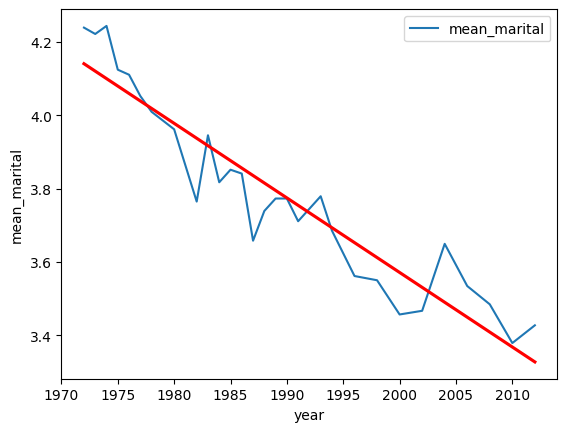

In [11]:
# Plot the average marital status in each year
import seaborn as sns
by_year.plot(x='year', y= 'mean_marital')
sns.regplot(x = 'year', y = 'mean_marital', data = by_year,  scatter = False, ci= None, fit_reg = True, color = 'red')

Based on the graph, we observe a downward trend in the average marital status, declining from 4.2 to 3.4. This represents nearly a one-level decrease in respondents' marital status over the four-decade period from 1972 to 2012. While there were noticeable spikes in marriage rates, or the number of widowed people, which were possibly influenced by social and economic factors, the overarching trend demonstrates a gradual decline in the average marital status. This shift reflects a broader societal change where individuals were increasingly directing their attention away from marriage and towards personal growth and other aspects of life.

In [12]:
# Run a regression to see how people's marital status changed
import statsmodels.api as sm
import statsmodels.formula.api as smf
lm_marital=smf.ols('n_marital~year', data=sub).fit()
lm_marital.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_marital   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1192.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          1.70e-258
Time:                        02:55:25   Log-Likelihood:            -1.0669e+05
No. Observations:               56702   AIC:                         2.134e+05
Df Residuals:                   56700   BIC:                         2.134e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.8568      1.133     37.817      0.000      40.636      45.078
year          -0.0196      0.001    -34.524      0.000      -0.021      -0.019
==============================================================================
Omnibus:                    14638.804   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7973.400
Skew:                          -0.786   Prob(JB):                         0.00
Kurtosis:                       2.050   Cond. No.                     3.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above regression indicates that with every year, people's marital status decreased by 0.0196 points on average. It is statistically significant with a p-value less than 0.05. The r-squared for this model is 0.021, which means the model only explains 2.1% of the variation in marital status among respondents, and further means the model isn't a good fit for this variable.

In [13]:
# Test for heterskedasticity
from statsmodels.compat import lzip
name=['BP', 'p-value', ' f-value', 'f p-value']
test=sm.stats.diagnostic.het_breuschpagan(lm_marital.resid, lm_marital.model.exog)
lzip(name,test)

[('BP', 485.7482892278001),
 ('p-value', 1.1993449234278405e-107),
 (' f-value', 489.92821757162477),
 ('f p-value', 4.249076601408215e-108)]

This shows that the model contains a heteroskedasticity with a f p-value as statistically significant, which is not good for the model. Let's use a dummy variable to check if it improves the model.

In [14]:
# Use dummy variables for years
lm_dummy = smf.ols('n_marital ~ C(year)', data = sub).fit()
lm_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_marital   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     48.71
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          1.78e-266
Time:                        02:55:26   Log-Likelihood:            -1.0660e+05
No. Observations:               56702   AIC:                         2.133e+05
Df Residuals:                   56673   BIC:                         2.135e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.2388      0.040    107.022      0.000       4.161       4.316
C(year)[T.1973]    -0.0174      0.057     -0.305      0.761      -0.129       0.094
C(year)[T.1974]     0.0046      0.057      0.081      0.936      -0.108       0.117
C(year)[T.1975]    -0.1147      0.057     -2.007      0.045      -0.227      -0.003
C(year)[T.1976]    -0.1285      0.057     -2.250      0.024      -0.240      -0.017
C(year)[T.1977]    -0.1866      0.057     -3.282      0.001      -0.298      -0.075
C(year)[T.1978]    -0.2296      0.057     -4.042      0.000      -0.341      -0.118
C(year)[T.1980]    -0.2773      0.057     -4.828      0.000      -0.390      -0.165
C(year)[T.1982]    -0.4744      0.054     -8.752      0.000      -0.581      -0.368
C(year)[T.1983]    -0.2935      0.056     -5.228      0.000      -0.404      -0.183
C(year)[T.1984]    -0.4217      0.057     -7.356      0.000      -0.534      -0.309
C(year)[T.1985]    -0.3874      0.057     -6.831      0.000      -0.499      -0.276
C(year)[T.1986]    -0.3980      0.057     -6.941      0.000      -0.510      -0.286
C(year)[T.1987]    -0.5810      0.054    -10.667      0.000      -0.688      -0.474
C(year)[T.1988]    -0.5000      0.057     -8.736      0.000      -0.612      -0.388
C(year)[T.1989]    -0.4660      0.057     -8.217      0.000      -0.577      -0.355
C(year)[T.1990]    -0.4660      0.058     -7.983      0.000      -0.580      -0.352
C(year)[T.1991]    -0.5279      0.057     -9.278      0.000      -0.639      -0.416
C(year)[T.1993]    -0.4598      0.056     -8.200      0.000      -0.570      -0.350
C(year)[T.1994]    -0.5536      0.049    -11.270      0.000      -0.650      -0.457
C(year)[T.1996]    -0.6773      0.049    -13.713      0.000      -0.774      -0.581
C(year)[T.1998]    -0.6889      0.050    -13.882      0.000      -0.786      -0.592
C(year)[T.2000]    -0.7822      0.050    -15.746      0.000      -0.880      -0.685
C(year)[T.2002]    -0.7722      0.050    -15.485      0.000      -0.870      -0.674
C(year)[T.2004]    -0.5896      0.050    -11.871      0.000      -0.687      -0.492
C(year)[T.2006]    -0.7046      0.046    -15.266      0.000      -0.795      -0.614
C(year)[T.2008]    -0.7545      0.053    -14.199      0.000      -0.859      -0.650
C(year)[T.2010]    -0.8601      0.053    -16.241      0.000      -0.964      -0.756
C(year)[T.2012]    -0.8117      0.053    -15.211      0.000      -0.916      -0.707
==============================================================================
Omnibus:                    14283.313   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7916.688
Skew:                          -0.784   Prob(JB):                         0.00
Kurtosis:                       2.056   Cond. No.                         33.1


The above model shows the change in marital status every year relative to 1972. For example, in 1998, people's marital status dropped by 0.6889 compared to the one in 1972. This value is highly statistically significant as its p-value is less than 0.001. Using dummy variables for years improves the model with the r-squared now at 0.024, which shows that 2.4% of the change in marital status can be explained with the model and a model based on an annual collection of marital status would be more accurate.

In [15]:
# Linear hypothesis test
hypothesis = '(C(year)[T.2004] = C(year)[T.2006])'

In [16]:
f_test = lm_dummy.f_test(hypothesis)
f_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=9.064828120138744, p=0.0026068774728778134, df_denom=5.67e+04, df_num=1>

A p-value lower than 0.05 shows that there is a significant difference in the overall marital status in 2004 and 2006.

<Axes: xlabel='year', ylabel='mean_marital'>

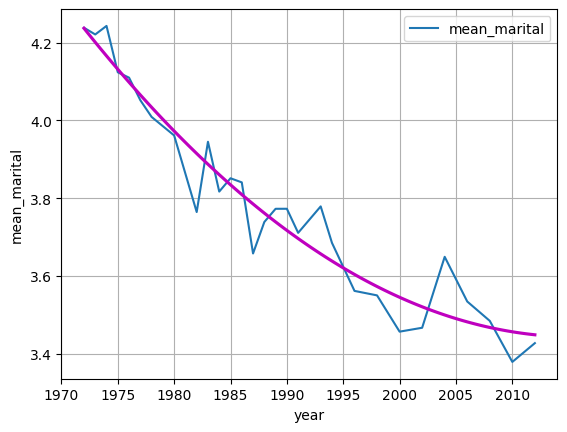

In [17]:
# Plot the trend again and superimpose a quadratic fitted line
by_year.plot(x = 'year', y = 'mean_marital', grid = True)
sns.regplot(x = 'year', y = 'mean_marital', data = by_year, order = 2,
            scatter = False, ci = None, fit_reg = True, color = 'm')

In [18]:
# Use quadratic variables for years
lm_maritalsq = smf.ols('n_marital ~ year + np.square(year)', data = sub).fit()
lm_maritalsq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_marital   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     630.8
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          1.15e-271
Time:                        02:55:26   Log-Likelihood:            -1.0665e+05
No. Observations:               56702   AIC:                         2.133e+05
Df Residuals:                   56699   BIC:                         2.133e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1782.3882    210.600      8.463      0.000    1369.611    2195.165
year               -1.7665      0.211     -8.353      0.000      -2.181      -1.352
np.square(year)     0.0004   5.31e-05      8.260      0.000       0.000       0.001
==============================================================================
Omnibus:                    14558.558   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7952.680
Skew:                          -0.785   Prob(JB):                         0.00
Kurtosis:                       2.051   Cond. No.                     1.25e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Through the results above, we can notice that people's marital status has been declining (shown by the negative coef of year), with its lowest level in 2010. However, there would be an increasing trend somewhere, shown by the positive coef of np.square(year). The r-squared here is 0.022, which is lower than the one of the model using dummy variables and shows that the model using quadratic variables is not good for the trend of marital status.

In [19]:
# See how education is a means of explaining the trend of people's marital status
sub['educ'].value_counts()

12.0    17437
16.0     6962
14.0     6145
13.0     4722
11.0     3392
10.0     2630
8.0      2590
15.0     2503
18.0     1967
9.0      1913
17.0     1677
20.0     1153
7.0       843
19.0      757
6.0       751
5.0       386
4.0       308
3.0       237
0.0       146
2.0       142
1.0        41
Name: educ, dtype: int64

In [20]:
sub['n_educ'] = sub['educ']
sub['n_educ']

0        16.0
1        10.0
2        12.0
3        17.0
4        12.0
         ... 
57056    16.0
57057    13.0
57058    13.0
57059    12.0
57060    12.0
Name: n_educ, Length: 56702, dtype: float64

In [21]:
sub['n_educ'].value_counts(normalize=True)

12.0    0.307520
16.0    0.122782
14.0    0.108374
13.0    0.083277
11.0    0.059822
10.0    0.046383
8.0     0.045677
15.0    0.044143
18.0    0.034690
9.0     0.033738
17.0    0.029576
20.0    0.020334
7.0     0.014867
19.0    0.013350
6.0     0.013245
5.0     0.006808
4.0     0.005432
3.0     0.004180
0.0     0.002575
2.0     0.002504
1.0     0.000723
Name: n_educ, dtype: float64

In [22]:
# Understand the trend of education
by_year = sub.groupby('year', as_index = False).agg({"n_educ": "mean"})\
          .rename(columns = {"n_educ": "mean_educ"})
by_year

,year,mean_educ
0,1972,11.334165
1,1973,11.607358
2,1974,11.796610
3,1975,11.684423
4,1976,11.700067
5,1977,11.684071
6,1978,11.919684
7,1980,12.015120
8,1982,11.890098
9,1983,12.316352


<Axes: xlabel='year', ylabel='mean_educ'>

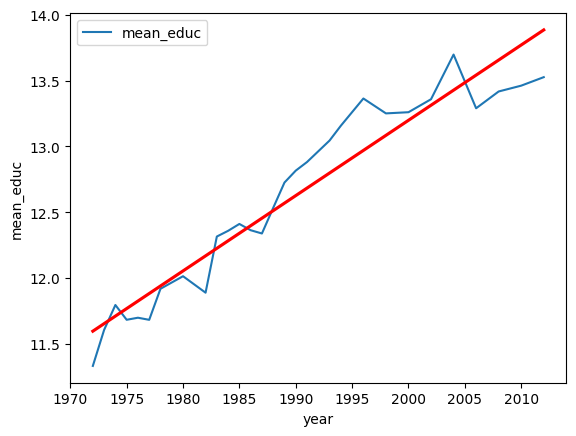

In [23]:
# Plot the trend of education
import seaborn as sns
by_year.plot(x='year', y= 'mean_educ')
sns.regplot(x = 'year', y = 'mean_educ', data = by_year,  scatter = False, ci= None, fit_reg = True, color = 'red')

Based on the graph, we can see an increasing trend of the number of years of education people had from 1972 to 2012. More individuals were inclined to pursue higher education and advanced degrees.

In [24]:
# Run a regression to see how people's education level changed over time
import statsmodels.api as sm
import statsmodels.formula.api as smf
lm_educ=smf.ols('n_educ~year', data=sub).fit()
lm_educ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 n_educ   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2547.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:55:27   Log-Likelihood:            -1.4481e+05
No. Observations:               56702   AIC:                         2.896e+05
Df Residuals:                   56700   BIC:                         2.896e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -99.2685      2.220    -44.719      0.000    -103.619     -94.918
year           0.0562      0.001     50.465      0.000       0.054       0.058
==============================================================================
Omnibus:                     2536.625   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4423.679
Skew:                          -0.369   Prob(JB):                         0.00
Kurtosis:                       4.153   Cond. No.                     3.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above regression indicates that with every year, the number of years of education of respondents increased by 0.0562 points, showing an increasing trend in pursuing higher education over time. It is statistically significant with a p-value less than 0.05. Its r-squared value is 0.043, meaning that 4.3% of the variation in the number of years of education can be explained by this model.

In [25]:
# Run a regression to see how people's marital status and education level changed together
import statsmodels.api as sm
import statsmodels.formula.api as smf
lm_marital2=smf.ols('n_marital~educ', data=sub).fit()
lm_marital2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_marital   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     184.2
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           6.95e-42
Time:                        02:55:27   Log-Likelihood:            -1.0718e+05
No. Observations:               56702   AIC:                         2.144e+05
Df Residuals:                   56700   BIC:                         2.144e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0983      0.028    147.368      0.000       4.044       4.153
educ          -0.0287      0.002    -13.571      0.000      -0.033      -0.025
==============================================================================
Omnibus:                    19507.828   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8290.417
Skew:                          -0.784   Prob(JB):                         0.00
Kurtosis:                       1.975   Cond. No.                         54.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above regression shows that with the increase of married people, people's education level would be lower by 0.0287 points. This value is highly statistically significant as its p-value is less than 0.001. This does make sense because people with higher levels of education tend to have more understanding about this society and also themselves besides traditional ideas, and are easier and willing to embrace a life without marriage. However, the model has an r-squared value of 0.003 which is not good, meaning that only 0.3% of the variation in people's marital status can be explained by the number of years of education people had.

In [27]:
# Variation with sex
by_sex = sub.groupby('sex', as_index = False).agg({"n_marital": "mean"})\
          .rename(columns = {"n_marital": "mean_marital"})
by_sex

,sex,mean_marital
0,1,3.701051
1,2,3.756668


The average marital status of men and women are very close, around 3.7.

In [28]:
# Variation with age
by_age = sub.groupby('age', as_index = False).agg({"n_marital": "mean"})\
          .rename(columns = {"n_marital": "mean_marital"})
by_age

,age,mean_marital
0,18.0,1.339806
1,19.0,1.359536
2,20.0,1.664216
3,21.0,1.977395
4,22.0,2.141529
...,...,...
67,85.0,4.095808
68,86.0,4.013514
69,87.0,4.064516
70,88.0,4.061856


<Axes: xlabel='age', ylabel='mean_marital'>

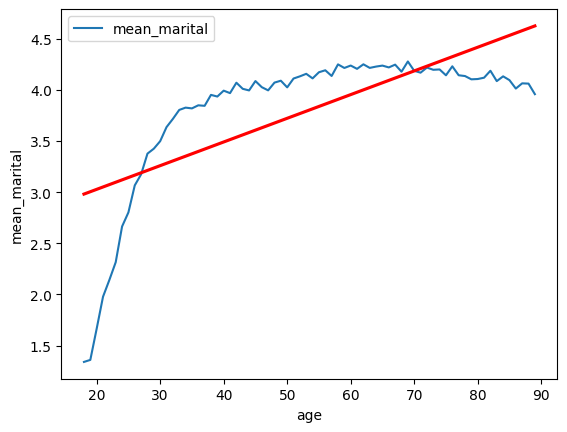

In [29]:
by_age.plot(x='age', y= 'mean_marital')
sns.regplot(x = 'age', y = 'mean_marital', data = by_age,  scatter = False, ci= None, fit_reg = True, color = 'red')

The above results reveals a natural trend where people typically enter into marriage after the age of 20, with the most rapid increase in the number of married individuals occurring between the ages of 20 and 30. Subsequently, the overall marital status stabilizes, exhibiting occasional fluctuations that may indicate events such as divorce and separation. It is hard for a couple to stay peace and love in the whole life, which makes love so valuable.